### Power Spectrum with CAMB
We obtain the import files (Power Spectrum) using CAMB

In [72]:
import numpy as np
import matplotlib.pyplot as plt
import camb
from scipy.integrate import quad
from scipy.interpolate import interp1d
import scienceplots
from scipy.signal import savgol_filter

In [73]:
plt.style.use(['science', 'bright'])
print(f"Versión de CAMB: {camb.__version__}")

Versión de CAMB: 1.5.8


Fiducial parameters

In [74]:
wb0 = 0.022445
wm0 = 0.143648
h = 0.67
c = 300.000

Omega_b0 = wb0/ (h**2)
H0 = 100 * h
Omega_m0 = wm0/ (h**2)
ns = 0.96 # Spectral index of the primordial density power spectrum
Omega_DE0 = 0.68

print(f"Omega_b0h2 = {Omega_b0 * h**2}")
print(f"Omega_m0h2 = {Omega_m0* h**2}")
# Setting number density of radiation to zero--------------------------------------------------------------------------
print(f"Omega_c0h2 = {(Omega_m0- Omega_b0)* h**2}")

Omega_b0h2 = 0.022445
Omega_m0h2 = 0.143648
Omega_c0h2 = 0.121203


In [75]:
# Define redshifts
redshifts = [1.65, 1.4, 1.2, 1.0]
epsilon = 1e-4

# Function to set cosmological parameters and get results
def get_camb_results(ns, wm0, wb0, h, epsilon, H0, redshifts, omch2_modifier):
    params = camb.CAMBparams()
    params.set_cosmology(H0=100 * h, ombh2=wb0, omch2=omch2_modifier(ns, wm0, wb0, epsilon, h))
    params.set_matter_power(redshifts=redshifts, kmax=2)
    params.InitPower.set_params(ns=ns)
    return camb.get_results(params)

def omch2_base(ns, wm0, wb0, epsilon, h):
    return (wm0 - wb0)
def omch2_mn_wb0(ns, wm0, wb0, epsilon, h):
    return wm0 - (wb0* (1 + epsilon))
def omch2_pl_wb0(ns, wm0, wb0, epsilon, h):
    return wm0 - (wb0 * (1 - epsilon))
def omch2_mn_wm0(ns, wm0, wb0, epsilon, h):
    return (wm0 * (1 - epsilon)) - wb0
def omch2_pl_wm0(ns, wm0, wb0, epsilon, h):
    return (wm0 * (1 + epsilon)) - wb0

ns_mn = ns - epsilon
ns_pl = ns + epsilon

h_mn = h - epsilon
h_pl = h + epsilon

# Get results for different scenarios
results = get_camb_results(ns, wm0, wb0, h, epsilon, H0, redshifts, omch2_base)
results_mn_b0 = get_camb_results(ns, wm0, wb0, h, epsilon, H0, redshifts, omch2_mn_wb0)
results_pl_b0 = get_camb_results(ns, wm0, wb0, h, epsilon, H0, redshifts, omch2_pl_wb0)
results_mn_m0 = get_camb_results(ns, wm0, wb0, h, epsilon, H0, redshifts, omch2_mn_wm0)
results_pl_m0 = get_camb_results(ns, wm0, wb0, h, epsilon, H0, redshifts, omch2_pl_wm0)

results_ns_mn = get_camb_results(ns_mn, wm0, wb0, h, epsilon, H0, redshifts, omch2_base)
results_ns_pl = get_camb_results(ns_pl, wm0, wb0, h, epsilon, H0, redshifts, omch2_base)

results_h_mn = get_camb_results(ns, wm0, wb0, h_mn, epsilon, H0, redshifts, omch2_base)
results_h_pl = get_camb_results(ns, wm0, wb0, h_pl, epsilon, H0, redshifts, omch2_base)

### The linear Power Spectrum (Pk)

In [76]:
kh, zs, Pk = results.get_linear_matter_power_spectrum(hubble_units=True, k_hunit= True)
kh, zs, Pk_mn_b0 = results_mn_b0.get_linear_matter_power_spectrum(hubble_units=True, k_hunit= True)
kh, zs, Pk_pl_b0 = results_pl_b0.get_linear_matter_power_spectrum(hubble_units=True, k_hunit= True)
kh, zs, Pk_mn_m0 = results_mn_m0.get_linear_matter_power_spectrum(hubble_units=True, k_hunit= True)
kh, zs, Pk_pl_m0 = results_pl_m0.get_linear_matter_power_spectrum(hubble_units=True, k_hunit= True)

kh, zs, Pk_ns_mn = results_ns_mn.get_linear_matter_power_spectrum(hubble_units=True, k_hunit= True)
kh, zs, Pk_ns_pl = results_ns_pl.get_linear_matter_power_spectrum(hubble_units=True, k_hunit= True)

kh, zs, Pk_h_mn = results_h_mn.get_linear_matter_power_spectrum(hubble_units=True, k_hunit= True)
kh, zs, Pk_h_pl = results_h_pl.get_linear_matter_power_spectrum(hubble_units=True, k_hunit= True)

In [77]:
# fig, ax = plt.subplots(ncols=1, nrows=1, sharey=True, figsize=(6, 4), constrained_layout = True, dpi=300)

# for z in range(len(redshifts)):
#     ax.loglog(kh, Pk[z,:], label=f'z={redshifts[z]}')

# ax.legend(loc='upper right')
# ax.set_title('Matter Power Spectrum')
# ax.set_xlabel(r'$k \, [h \, Mpc^{-1}]$')
# ax.set_ylabel(r'$P(k) \, [h^{-3} Mpc^{3}]$')

# plt.show()

### The Non-linear Power Spectrum (Pk_nonlinear)

In [78]:
#kh_nonlinear, zs, Pk_nonlinear = results.get_linear_matter_power_spectrum(hubble_units=True, k_hunit= True, nonlinear=True)

In [79]:
# fig, ax = plt.subplots(ncols=1, nrows=1, sharey=True, figsize=(6, 4), constrained_layout = True, dpi=300)

# for z in range(len(redshifts)):
#     ax.loglog(kh, Pk[z,:], color = 'b')
#     ax.loglog(kh_nonlinear, Pk_nonlinear[z,:], '--', color = 'r' )

# ax.legend(['linear', 'non-linear'], loc='upper right')
# ax.set_title('Linear and Nonlinear Matter Power Spectrum')
# ax.set_xlabel(r'$k \, [h \, Mpc^{-1}]$')
# ax.set_ylabel(r'$P(k) \, [h^{-3} Mpc^{3}]$')

# plt.show()

In [ ]:
class Interpolate_PS:
    def __init__(self):
        self.input_names = ['Pdd', 'P_mn_b0', 'P_pl_b0', 'P_mn_m0', 'P_pl_m0', 'P_ns_mn', 'P_ns_pl', 'P_h_mn', 'P_h_pl']
        self.Pk_input_list = [Pk, Pk_mn_b0, Pk_pl_b0, Pk_mn_m0, Pk_pl_m0, Pk_ns_mn, Pk_ns_pl, Pk_h_mn, Pk_h_pl]

    def interpolate_Pk(self, k, z, Pk_input, kh, zs):
        index = np.where(zs == z)[0][0]
        interp_func = interp1d(np.log(kh), np.log(Pk_input[index]), kind='cubic')
        return np.exp(interp_func(np.log(k)))


Interpolation = Interpolate_PS()
input_names = Interpolation.input_names
Pk_input_list = Interpolation.Pk_input_list

for name, Pk_input in zip(input_names, Pk_input_list):
    exec(f"def {name}(k, z): return Interpolation.interpolate_Pk(k, z, Pk_input, kh, zs)")
# Example of usage
#print(f"Pdd(0.1, zs[0]) = {Pdd(0.1, zs[0])}")


# # Example graph
# fig, ax = plt.subplots(ncols=1, nrows=1, sharey=True, figsize=(6, 4), constrained_layout=True, dpi=300)
# for z in redshifts:
#     ax.loglog(kh, P_mn_b0(kh, z), label=f'z={z}')

# ax.legend(loc='upper right')
# ax.set_title('Derivative with respect to wb of the linear Matter Power Spectrum')
# ax.set_xlabel(r'$k \, [h \, \mathrm{Mpc}^{-1}]$')
# ax.set_ylabel(r'$P(k) \, [h^{-3} \, \mathrm{Mpc}^{3}]$')

# plt.show()

### The nw Power Spectrum
The non-wigged Power Spectrum is calculated applying a savgol filter in the linear power spectrum.

In [97]:
np.set_printoptions(precision=2)  # For compact display.

class PS_nw:
    def __init__(self):
        self.input_names = ['Pdd_nw', 'P_mn_b0_nw', 'P_pl_b0_nw', 'P_mn_m0_nw', 'P_pl_m0_nw', 'P_ns_mn_nw', 'P_ns_pl_nw', 'P_h_mn_nw', 'P_h_pl_nw']
        # Los siguientes números son arbitrarios?
        self.window_size, self.poly_order = 150, 3
        self.input_functions= [Pdd, P_mn_b0, P_pl_b0, P_mn_m0, P_pl_m0, P_ns_mn, P_ns_pl, P_h_mn, P_h_pl]

    def P_nw(self, k, z, P_input):
        P_values = P_input(np.exp(k), z)
        return np.exp(savgol_filter(np.log(P_values), self.window_size, self.poly_order))

Ps_nw = PS_nw()
input_names = Ps_nw.input_names
input_functions = Ps_nw.input_functions

for name, P_input in zip(input_names, input_functions):
    exec(f"def {name}(k, z): return Ps_nw.P_nw(k, z, P_input)")

print(f"Pdd_nw(0.1, zs[0]) = {Pdd_nw(0.1, zs[0])}")

#self.input_names = ['Pdd', 'P_mn_b0', 'P_pl_b0', 'P_mn_m0', 'P_pl_m0', 'P_ns_mn', 'P_ns_pl', 'P_h_mn', 'P_h_pl']


IndexError: tuple index out of range

C:\Users\antoc\AppData\Local\Temp\ipykernel_35536\2465233030.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc='upper right')


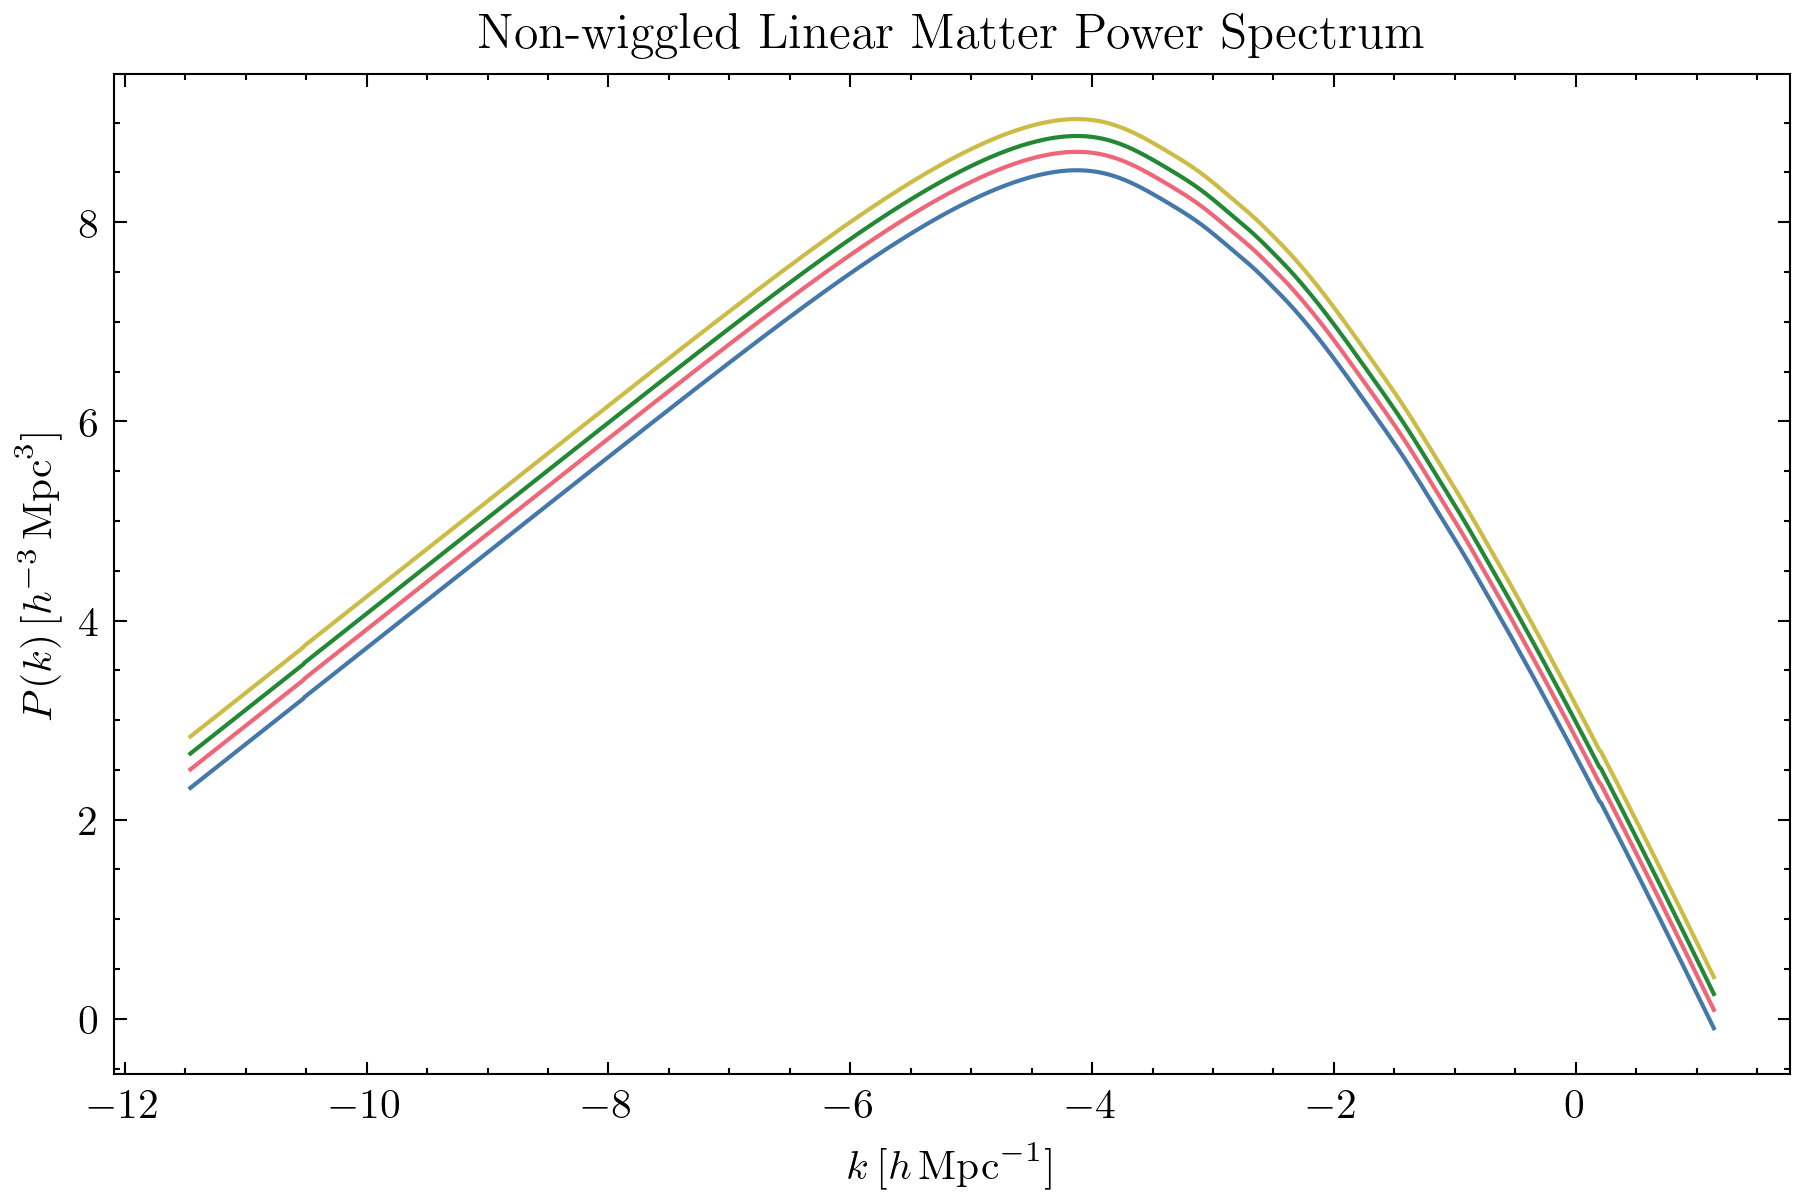

In [98]:
# Example plot
ks = np.linspace(np.log(kh[0]), np.log(kh[-1]), 1000)

def P_dd_nw(k,z):
        return np.exp(savgol_filter(np.log(P_dd(k,z)), window_size, poly_order))

fig, ax = plt.subplots(ncols=1, nrows=1, sharey=True, figsize=(6, 4), constrained_layout=True, dpi=300)
for z in redshifts:
    ax.plot(ks, np.log(Pdd_nw(ks, z)))
ax.legend(loc='upper right')
ax.set_title('Non-wiggled Linear Matter Power Spectrum')
ax.set_xlabel(r'$k \, [h \, \mathrm{Mpc}^{-1}]$')
ax.set_ylabel(r'$P(k) \, [h^{-3} \, \mathrm{Mpc}^{3}]$')

plt.show()